# PROJET TECHNOVA - Analyse de l'attrition des employés


📋 Contexte :
TechNova (ESN) fait face à un taux de démission élevé.
Objectif : Identifier les causes et proposer des leviers d'action.

📊 Données disponibles :
- SIRH : Informations employés (fonction, salaire, ancienneté...)
- EVAL : Évaluations annuelles et satisfaction
- SONDAGE : Questionnaire bien-être + indicateur départ

🎯 Mission :
Phase 1 : Exploration et fusion des 3 sources
Phase 2 : Préparation données pour modélisation ML
Phase 3 : Modélisation et identification des causes


## 📦 PARTIE 1 : CONFIGURATION & IMPORTS


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration affichage pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)
pd.set_option('display.precision', 2)

# Configuration graphiques
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

In [2]:
import os

# Créer dossiers nécessaires
os.makedirs('graphiques', exist_ok=True)
os.makedirs('data', exist_ok=True)

print("✅ Dossiers créés/vérifiés :")
print("   • graphiques/")
print("   • data/")

✅ Dossiers créés/vérifiés :
   • graphiques/
   • data/


## 🔍 PARTIE 3 : EXPLORATION INITIALE DES DONNÉES


In [ ]:
import pandas as pd

# Charger les données
df_sirh = pd.read_csv('../data/extrait_sirh.csv')
df_eval = pd.read_csv('../data/extrait_eval.csv')
df_sondage = pd.read_csv('../data/extrait_sondage.csv')

# Vérifier
print(df_sirh.shape)
print(df_eval.shape)
print(df_sondage.shape)

(1470, 12)
(1470, 10)
(1470, 12)


In [4]:
df_sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [5]:
df_sirh.head()

,id_employee,age,genre,revenu_mensuel,statut_marital,departement,poste,nombre_experiences_precedentes,nombre_heures_travailless,annee_experience_totale,annees_dans_l_entreprise,annees_dans_le_poste_actuel
0,1,41,F,5993,Célibataire,Commercial,Cadre Commercial,8,80,8,6,4
1,2,49,M,5130,Marié(e),Consulting,Assistant de Direction,1,80,10,10,7
2,4,37,M,2090,Célibataire,Consulting,Consultant,6,80,7,0,0
3,5,33,F,2909,Marié(e),Consulting,Assistant de Direction,1,80,8,8,7
4,7,27,M,3468,Marié(e),Consulting,Consultant,9,80,6,2,2


In [6]:
df_eval.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [7]:
df_eval.head()

,satisfaction_employee_environnement,note_evaluation_precedente,niveau_hierarchique_poste,satisfaction_employee_nature_travail,satisfaction_employee_equipe,satisfaction_employee_equilibre_pro_perso,eval_number,note_evaluation_actuelle,heure_supplementaires,augementation_salaire_precedente
0,2,3,2,4,1,1,E_1,3,Oui,11 %
1,3,2,2,2,4,3,E_2,4,Non,23 %
2,4,2,1,3,2,3,E_4,3,Oui,15 %
3,4,3,1,3,3,3,E_5,3,Oui,11 %
4,1,3,1,2,4,3,E_7,3,Non,12 %


In [8]:
df_sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

In [9]:
df_sondage.head()

,a_quitte_l_entreprise,nombre_participation_pee,nb_formations_suivies,nombre_employee_sous_responsabilite,code_sondage,distance_domicile_travail,niveau_education,domaine_etude,ayant_enfants,frequence_deplacement,annees_depuis_la_derniere_promotion,annes_sous_responsable_actuel
0,Oui,0,0,1,1,1,2,Infra & Cloud,Y,Occasionnel,0,5
1,Non,1,3,1,2,8,1,Infra & Cloud,Y,Frequent,1,7
2,Oui,0,3,1,4,2,2,Autre,Y,Occasionnel,0,0
3,Non,0,3,1,5,3,4,Infra & Cloud,Y,Frequent,3,0
4,Non,1,3,1,7,2,1,Transformation Digitale,Y,Occasionnel,2,2


In [10]:
# Afficher les colonnes de chaque DataFrame
print("📋 SIRH:")
print(df_sirh.columns.tolist())
print("\n📋 EVAL:")
print(df_eval.columns.tolist())
print("\n📋 SONDAGE:")
print(df_sondage.columns.tolist())

📋 SIRH:
['id_employee', 'age', 'genre', 'revenu_mensuel', 'statut_marital', 'departement', 'poste', 'nombre_experiences_precedentes', 'nombre_heures_travailless', 'annee_experience_totale', 'annees_dans_l_entreprise', 'annees_dans_le_poste_actuel']

📋 EVAL:
['satisfaction_employee_environnement', 'note_evaluation_precedente', 'niveau_hierarchique_poste', 'satisfaction_employee_nature_travail', 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso', 'eval_number', 'note_evaluation_actuelle', 'heure_supplementaires', 'augementation_salaire_precedente']

📋 SONDAGE:
['a_quitte_l_entreprise', 'nombre_participation_pee', 'nb_formations_suivies', 'nombre_employee_sous_responsabilite', 'code_sondage', 'distance_domicile_travail', 'niveau_education', 'domaine_etude', 'ayant_enfants', 'frequence_deplacement', 'annees_depuis_la_derniere_promotion', 'annes_sous_responsable_actuel']


## PARTIE 4 : Nettoyage clés jointure


id_employee, eval_number, code_sondage

🧹 Nettoyage des clés de jointure


In [11]:
# 🧹 Nettoyage des clés de jointure

# 1. Vérifier le format actuel
print("📌 Format actuel de eval_number:")
print(df_eval['eval_number'].head())

# 2. Extraire l'ID numérique (enlever "E_")
df_eval['id_employee'] = df_eval['eval_number'].str.replace('E_', '').astype(int)

# 3. Vérifier le résultat
print("\n✅ Après nettoyage:")
print(df_eval[['eval_number', 'id_employee']].head())

# 4. Vérifier que les ID correspondent
print(f"\n📊 SIRH - ID min: {df_sirh['id_employee'].min()}, max: {df_sirh['id_employee'].max()}")
print(f"📊 EVAL - ID min: {df_eval['id_employee'].min()}, max: {df_eval['id_employee'].max()}")

📌 Format actuel de eval_number:
0    E_1
1    E_2
2    E_4
3    E_5
4    E_7
Name: eval_number, dtype: object

✅ Après nettoyage:
  eval_number  id_employee
0         E_1            1
1         E_2            2
2         E_4            4
3         E_5            5
4         E_7            7

📊 SIRH - ID min: 1, max: 2068
📊 EVAL - ID min: 1, max: 2068


jointure inner sirh et eval

In [12]:
# 🔗 Fusion des 3 tables

# Étape 1 : Joindre SIRH + EVAL
df_merged = df_sirh.merge(
    df_eval, 
    on='id_employee', 
    how='inner'  # On garde uniquement les employés présents dans les 2 tables
)

print(f"✅ Après fusion SIRH + EVAL: {df_merged.shape}")

# Étape 2 : Ajouter SONDAGE
df_final = df_merged.merge(
    df_sondage,
    left_on='id_employee',
    right_on='code_sondage',
    how='inner'
)

print(f"✅ Après fusion avec SONDAGE: {df_final.shape}")

# Vérification rapide
print(f"\n📊 Colonnes totales: {df_final.shape[1]}")
print(f"📊 Employés dans le dataset final: {df_final.shape[0]}")

✅ Après fusion SIRH + EVAL: (1470, 22)
✅ Après fusion avec SONDAGE: (1470, 34)

📊 Colonnes totales: 34
📊 Employés dans le dataset final: 1470


Supprimer les colonnes inutiles

In [13]:
# 🧹 Nettoyage des colonnes redondantes

# Supprimer code_sondage (= id_employee) et eval_number (déjà converti)
df_final = df_final.drop(columns=['code_sondage', 'eval_number'])

print(f"✅ Après nettoyage: {df_final.shape}")
print(f"📊 Colonnes restantes: {df_final.shape[1]}")

✅ Après nettoyage: (1470, 32)
📊 Colonnes restantes: 32


## PARTIE 5 : Analyse variable cible


📊 Distribution de la variable cible:
a_quitte_l_entreprise
Non    1233
Oui     237
Name: count, dtype: int64

📈 Proportions:
a_quitte_l_entreprise
Non    83.88
Oui    16.12
Name: proportion, dtype: float64

✅ Graphique sauvegardé : graphiques/distribution_variable_cible.png


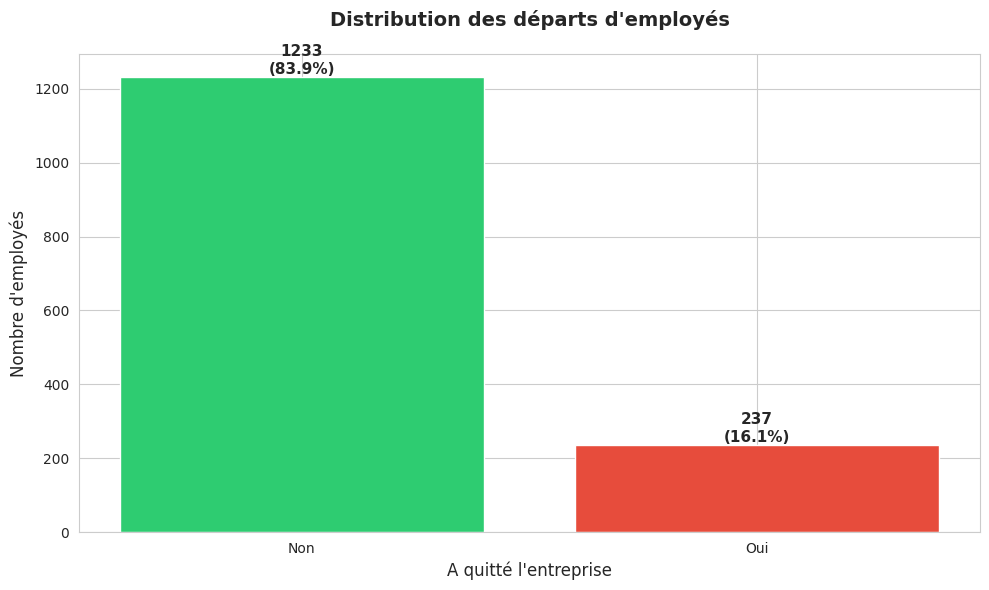

In [14]:
import matplotlib.pyplot as plt
import os

# 📊 Distribution de la variable cible
print("📊 Distribution de la variable cible:")
print(df_final['a_quitte_l_entreprise'].value_counts())

print("\n📈 Proportions:")
proportions = df_final['a_quitte_l_entreprise'].value_counts(normalize=True) * 100
print(proportions)

# 📈 Création du graphique
fig, ax = plt.subplots(figsize=(10, 6))

counts = df_final['a_quitte_l_entreprise'].value_counts()
bars = ax.bar(counts.index, counts.values, color=['#2ecc71', '#e74c3c'])

# Ajout des valeurs sur les barres
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height)}\n({height/len(df_final)*100:.1f}%)',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_title('Distribution des départs d\'employés', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('A quitté l\'entreprise', fontsize=12)
ax.set_ylabel('Nombre d\'employés', fontsize=12)

# ✅ CORRECTION : définir les ticks PUIS les labels
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non', 'Oui'], rotation=0)

plt.tight_layout()

# 💾 Sauvegarde
os.makedirs('graphiques', exist_ok=True)
plt.savefig('graphiques/distribution_variable_cible.png', dpi=300, bbox_inches='tight')
print("\n✅ Graphique sauvegardé : graphiques/distribution_variable_cible.png")

plt.show()

## 📊 PARTIE 6 : STATISTIQUES DESCRIPTIVES


### 6.1a : STATISTIQUES DESCRIPTIVES DE BASE - VARIABLES NUMÉRIQUES

In [15]:
# Variables numériques
colonnes_num = df_final.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"\n🔢 {len(colonnes_num)} variables numériques détectées\n")

# Statistiques descriptives
stats_desc = df_final[colonnes_num].describe().T
print(stats_desc)

# 💾 Sauvegarde en CSV
os.makedirs('resultats', exist_ok=True)
stats_desc.to_csv('resultats/stats_descriptives.csv')
print("\n✅ Tableau sauvegardé : resultats/stats_descriptives.csv")

print("\n💡 Points clés à retenir :")
print(f"   • Âge moyen : {df_final['age'].mean():.1f} ans")
print(f"   • Salaire moyen : {df_final['revenu_mensuel'].mean():.0f} €")
print(f"   • Ancienneté moyenne : {df_final['annees_dans_l_entreprise'].mean():.1f} ans")


🔢 22 variables numériques détectées

                                            count     mean      std     min      25%     50%      75%      max
id_employee                                1470.0  1024.87   602.02     1.0   491.25  1020.5  1555.75   2068.0
age                                        1470.0    36.92     9.14    18.0    30.00    36.0    43.00     60.0
revenu_mensuel                             1470.0  6502.93  4707.96  1009.0  2911.00  4919.0  8379.00  19999.0
nombre_experiences_precedentes             1470.0     2.69     2.50     0.0     1.00     2.0     4.00      9.0
nombre_heures_travailless                  1470.0    80.00     0.00    80.0    80.00    80.0    80.00     80.0
annee_experience_totale                    1470.0    11.28     7.78     0.0     6.00    10.0    15.00     40.0
annees_dans_l_entreprise                   1470.0     7.01     6.13     0.0     3.00     5.0     9.00     40.0
annees_dans_le_poste_actuel                1470.0     4.23     3.62     0.

### 6.1b : STATISTIQUES DESCRIPTIVES DE BASE - VARIABLES QUANTITATIVES

In [16]:
# Variables qualitatives
colonnes_quali = df_final.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 Variables QUALITATIVES : {len(colonnes_quali)}")
for col in colonnes_quali:
    nb_unique = df_final[col].nunique()
    print(f"   • {col:35s} ({nb_unique} valeurs uniques)")


📝 Variables QUALITATIVES : 10
   • genre                               (2 valeurs uniques)
   • statut_marital                      (3 valeurs uniques)
   • departement                         (3 valeurs uniques)
   • poste                               (9 valeurs uniques)
   • heure_supplementaires               (2 valeurs uniques)
   • augementation_salaire_precedente    (15 valeurs uniques)
   • a_quitte_l_entreprise               (2 valeurs uniques)
   • domaine_etude                       (6 valeurs uniques)
   • ayant_enfants                       (1 valeurs uniques)
   • frequence_deplacement               (3 valeurs uniques)


### 6.1c : STATISTIQUES DESCRIPTIVES DE BASE - SUPPRESSION VARIABLES CONSTANTES

In [17]:
variables_constantes = []
variables_suspects = []

for col in colonnes_quali:
    nb_unique = df_final[col].nunique()
    
    if nb_unique == 1:
        variables_constantes.append(col)
        print(f"\n⚠️  {col} : Variable CONSTANTE")
        print(f"   Valeur unique : {df_final[col].unique()}")
        print(f"   → À SUPPRIMER (aucune information)")
    elif nb_unique > 50:
        variables_suspects.append(col)
        print(f"\n⚠️  {col} : {nb_unique} valeurs uniques (trop nombreuses)")
        print(f"   → Vérifier pertinence")

if len(variables_constantes) == 0 and len(variables_suspects) == 0:
    print("\n✅ Aucune variable problématique détectée")

if len(variables_constantes) > 0:
    print("\n" + "-"*70)
    print("3️⃣  SUPPRESSION VARIABLES CONSTANTES")
    print("-"*70)
    
    print(f"\n🗑️  Suppression de {len(variables_constantes)} variable(s) :")
    for col in variables_constantes:
        print(f"   • {col}")
    
    df_final = df_final.drop(columns=variables_constantes)
    
    # Mettre à jour la liste des colonnes quali
    colonnes_quali = df_final.select_dtypes(include=['object']).columns.tolist()
    
    print(f"\n✅ Dataset après nettoyage : {df_final.shape}")


⚠️  ayant_enfants : Variable CONSTANTE
   Valeur unique : ['Y']
   → À SUPPRIMER (aucune information)

----------------------------------------------------------------------
3️⃣  SUPPRESSION VARIABLES CONSTANTES
----------------------------------------------------------------------

🗑️  Suppression de 1 variable(s) :
   • ayant_enfants

✅ Dataset après nettoyage : (1470, 31)


### 6.2a : Comparaison Partis vs Restés (STATS)


In [18]:
# Variables clés à comparer
vars_cles = ['age', 'revenu_mensuel', 'annees_dans_l_entreprise', 
             'annee_experience_totale', 'satisfaction_employee_environnement',
             'note_evaluation_actuelle']

# Stats textuelles
for var in vars_cles:
    print(f"\n📊 {var.upper().replace('_', ' ')} :")
    print("-"*70)
    
    stats_by_depart = df_final.groupby('a_quitte_l_entreprise')[var].agg([
        ('Moyenne', 'mean'),
        ('Médiane', 'median'),
        ('Écart-type', 'std'),
        ('Min', 'min'),
        ('Max', 'max')
    ])
    print(stats_by_depart.round(2))
    
    # Différence
    diff = stats_by_depart.loc['Oui', 'Moyenne'] - stats_by_depart.loc['Non', 'Moyenne']
    print(f"   💡 Différence : {diff:+.2f} ({'Partis > Restés' if diff > 0 else 'Restés > Partis'})")

print("\n" + "="*70)


📊 AGE :
----------------------------------------------------------------------
                       Moyenne  Médiane  Écart-type  Min  Max
a_quitte_l_entreprise                                        
Non                      37.56     36.0        8.89   18   60
Oui                      33.61     32.0        9.69   18   58
   💡 Différence : -3.95 (Restés > Partis)

📊 REVENU MENSUEL :
----------------------------------------------------------------------
                       Moyenne  Médiane  Écart-type   Min    Max
a_quitte_l_entreprise                                           
Non                    6832.74   5204.0     4818.21  1051  19999
Oui                    4787.09   3202.0     3640.21  1009  19859
   💡 Différence : -2045.65 (Restés > Partis)

📊 ANNEES DANS L ENTREPRISE :
----------------------------------------------------------------------
                       Moyenne  Médiane  Écart-type  Min  Max
a_quitte_l_entreprise                                        
Non      

### 6.2b : Comparaison Partis vs Restés (GRAPHIQUES)


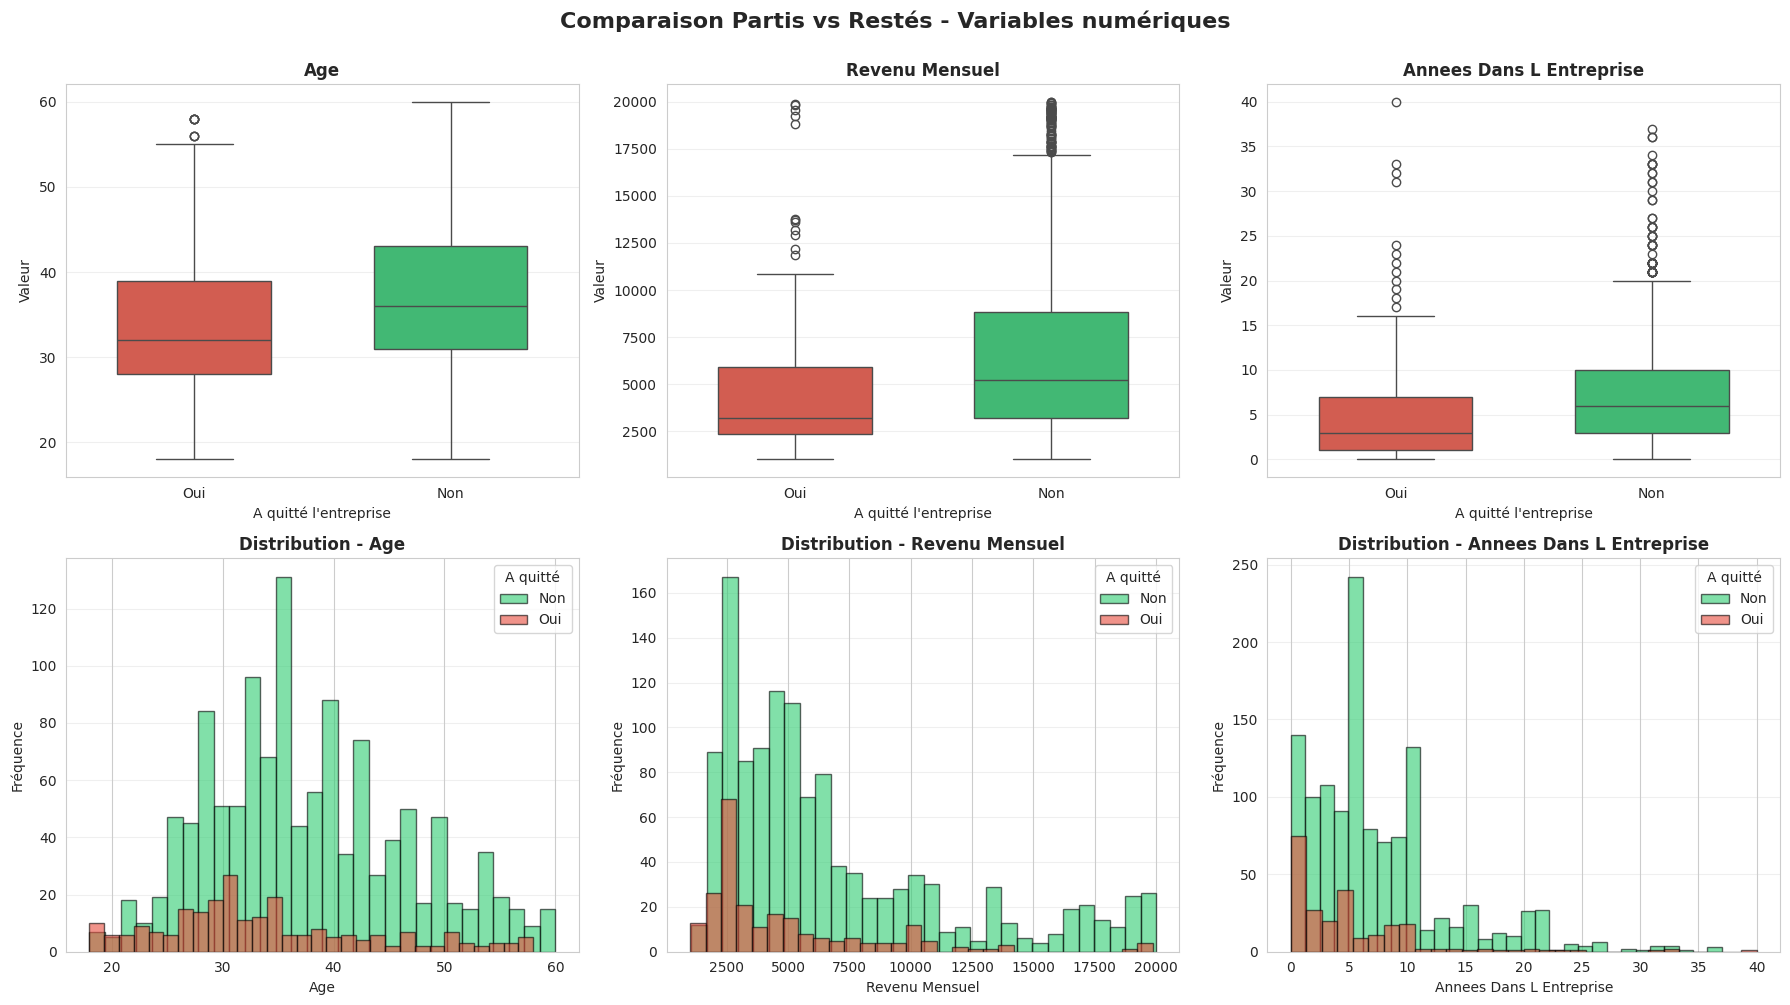

✅ Graphique sauvegardé : graphiques/comparaison_partis_restes.png


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Créer le dossier graphiques s'il n'existe pas
os.makedirs('graphiques', exist_ok=True)

# Variables à visualiser
vars_a_visualiser = ['age', 'revenu_mensuel', 'annees_dans_l_entreprise']

# Créer subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Comparaison Partis vs Restés - Variables numériques', 
             fontsize=16, fontweight='bold', y=1.00)

for idx, var in enumerate(vars_a_visualiser):
    # === BOXPLOT (ligne 1) - VERSION CORRIGÉE ===
    ax1 = axes[0, idx]
    
    # Solution pour éviter le warning : ajouter hue + legend=False
    sns.boxplot(
        data=df_final, 
        x='a_quitte_l_entreprise', 
        y=var,
        hue='a_quitte_l_entreprise',  # ⬅️ Ajouté
        ax=ax1,
        palette={'Non': '#2ecc71', 'Oui': '#e74c3c'},
        legend=False,  # ⬅️ Ajouté
        width=0.6
    )
    
    ax1.set_title(f'{var.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax1.set_xlabel('A quitté l\'entreprise')
    ax1.set_ylabel('Valeur')
    ax1.grid(axis='y', alpha=0.3)
    
    # === HISTOGRAMME (ligne 2) ===
    ax2 = axes[1, idx]
    for depart in ['Non', 'Oui']:
        data = df_final[df_final['a_quitte_l_entreprise'] == depart][var]
        color = '#2ecc71' if depart == 'Non' else '#e74c3c'
        ax2.hist(data, bins=30, alpha=0.6, label=depart, color=color, edgecolor='black')
    
    ax2.set_title(f'Distribution - {var.replace("_", " ").title()}', fontsize=12, fontweight='bold')
    ax2.set_xlabel(var.replace('_', ' ').title())
    ax2.set_ylabel('Fréquence')
    ax2.legend(title='A quitté', loc='upper right')
    ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('graphiques/comparaison_partis_restes.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : graphiques/comparaison_partis_restes.png")

### 6.3a : Variables qualitatives (STATS)


In [20]:
# ════════════════════════════════════════════════════════
# 📊 PARTIE 6.3a : VARIABLES QUALITATIVES (STATS)
# ════════════════════════════════════════════════════════

print("="*70)
print("📋 DISTRIBUTION DES VARIABLES QUALITATIVES")
print("="*70)

# Variables qualitatives à analyser
colonnes_quali = ['genre', 'statut_marital', 'departement', 'poste', 
                  'heure_supplementaires', 'domaine_etude', 'frequence_deplacement']

print(f"\n📝 {len(colonnes_quali)} variables qualitatives à analyser\n")

for col in colonnes_quali:
    print(f"\n{'='*70}")
    print(f"📌 {col.upper().replace('_', ' ')}")
    print(f"{'='*70}")
    
    # Distribution des valeurs
    print(f"\n🔢 Distribution ({df_final[col].nunique()} valeurs uniques) :")
    print("-"*70)
    
    counts = df_final[col].value_counts()
    percentages = df_final[col].value_counts(normalize=True) * 100
    
    # Tableau combiné
    distribution = pd.DataFrame({
        'Effectif': counts,
        'Pourcentage (%)': percentages.round(1)
    })
    print(distribution)
    
    # Mode (valeur la plus fréquente)
    mode_value = df_final[col].mode()[0]
    mode_count = counts.iloc[0]
    mode_pct = percentages.iloc[0]
    print(f"\n   💡 Valeur dominante : {mode_value} ({mode_count} employés, {mode_pct:.1f}%)")

print("\n" + "="*70)
print("✅ Analyse des variables qualitatives terminée")
print("="*70)

📋 DISTRIBUTION DES VARIABLES QUALITATIVES

📝 7 variables qualitatives à analyser


📌 GENRE

🔢 Distribution (2 valeurs uniques) :
----------------------------------------------------------------------
       Effectif  Pourcentage (%)
genre                           
M           882             60.0
F           588             40.0

   💡 Valeur dominante : M (882 employés, 60.0%)

📌 STATUT MARITAL

🔢 Distribution (3 valeurs uniques) :
----------------------------------------------------------------------
                Effectif  Pourcentage (%)
statut_marital                           
Marié(e)             673             45.8
Célibataire          470             32.0
Divorcé(e)           327             22.2

   💡 Valeur dominante : Marié(e) (673 employés, 45.8%)

📌 DEPARTEMENT

🔢 Distribution (3 valeurs uniques) :
----------------------------------------------------------------------
                     Effectif  Pourcentage (%)
departement                                   
Consulti

### PARTIE 6.3b : VARIABLES QUALITATIVES (GRAPHIQUES)


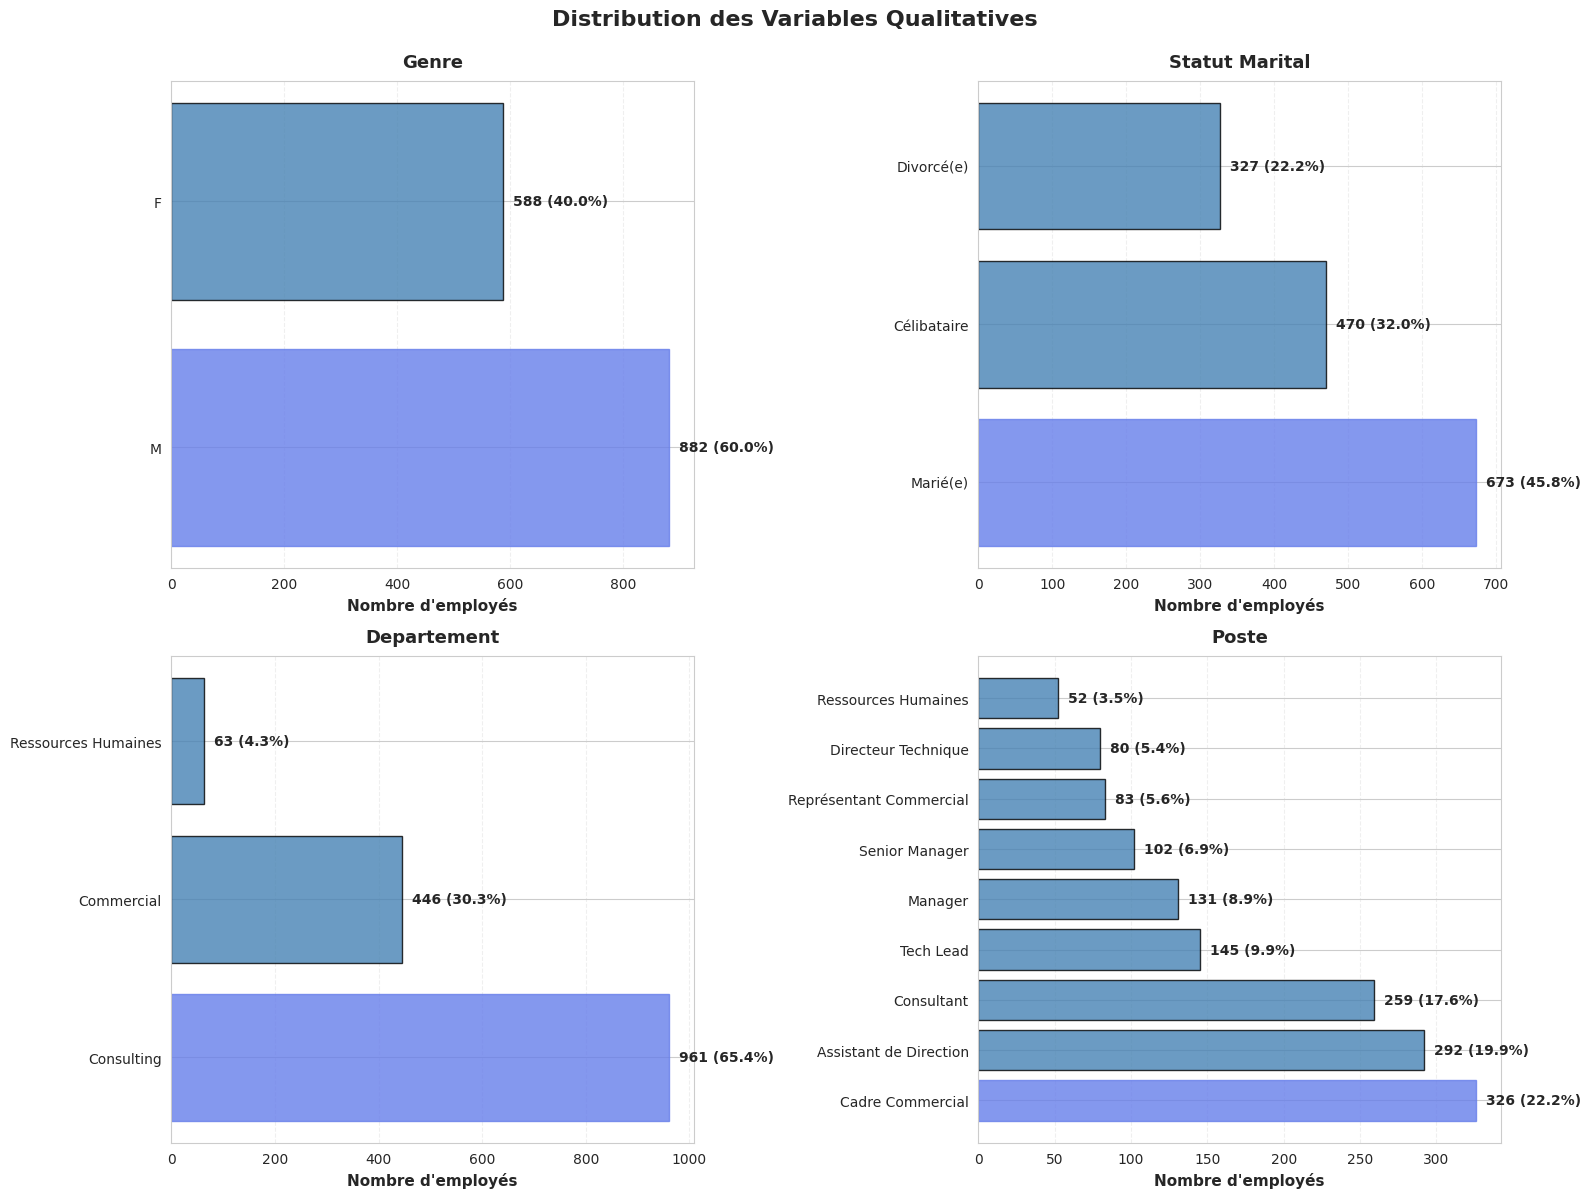

✅ Graphique sauvegardé : graphiques/distribution_variables_quali.png


In [21]:
# ════════════════════════════════════════════════════════
# 📊 PARTIE 6.3b : VARIABLES QUALITATIVES (GRAPHIQUES)
# ════════════════════════════════════════════════════════

import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('graphiques', exist_ok=True)

# Variables quali principales à visualiser
vars_quali = ['genre', 'statut_marital', 'departement', 'poste']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Distribution des Variables Qualitatives', 
             fontsize=16, fontweight='bold', y=0.995)

for idx, col in enumerate(vars_quali):
    ax = axes[idx // 2, idx % 2]
    
    # Compter et trier par ordre décroissant
    counts = df_final[col].value_counts()
    
    # Créer barplot horizontal (plus lisible)
    bars = ax.barh(range(len(counts)), counts.values, color='steelblue', edgecolor='black', alpha=0.8)
    
    # Configurer axes
    ax.set_yticks(range(len(counts)))
    ax.set_yticklabels(counts.index)
    ax.set_xlabel('Nombre d\'employés', fontsize=11, fontweight='bold')
    ax.set_title(f'{col.replace("_", " ").title()}', fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Ajouter valeurs sur les barres
    for i, (v, label) in enumerate(zip(counts.values, counts.index)):
        percentage = (v / len(df_final)) * 100
        ax.text(v + (counts.max() * 0.02), i, f'{v} ({percentage:.1f}%)', 
                va='center', fontsize=10, fontweight='bold')
    
    # Colorer la barre la plus haute
    bars[0].set_color('#667eea')

plt.tight_layout()
plt.savefig('graphiques/distribution_variables_quali.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : graphiques/distribution_variables_quali.png")

### PARTIE 6.4a : TAUX DE DÉPART PAR CATÉGORIE (STATS)


In [22]:
# ════════════════════════════════════════════════════════
# 📊 PARTIE 6.4a : TAUX DE DÉPART PAR CATÉGORIE (STATS)
# ════════════════════════════════════════════════════════

print("="*70)
print("🎯 TAUX DE DÉPART PAR CATÉGORIE")
print("="*70)

colonnes_quali_analyse = ['genre', 'statut_marital', 'departement', 'poste', 
                          'heure_supplementaires', 'frequence_deplacement', 'domaine_etude']

for col in colonnes_quali_analyse:
    print(f"\n{'='*70}")
    print(f"📊 {col.upper().replace('_', ' ')}")
    print(f"{'='*70}")
    
    # Calculer taux de départ par catégorie
    taux_depart = df_final.groupby(col)['a_quitte_l_entreprise'].apply(
        lambda x: (x == 'Oui').sum() / len(x) * 100
    ).sort_values(ascending=False)
    
    # Tableau avec effectifs
    effectifs = df_final[col].value_counts()
    departs = df_final[df_final['a_quitte_l_entreprise'] == 'Oui'][col].value_counts()
    
    resultat = pd.DataFrame({
        'Total employés': effectifs,
        'Nombre départs': departs,
        'Taux départ (%)': taux_depart
    }).sort_values('Taux départ (%)', ascending=False)
    
    print("\n" + "-"*70)
    print(resultat.round(1))
    
    # Identifier catégories à risque
    categories_risque = taux_depart[taux_depart > 20]
    categories_attention = taux_depart[(taux_depart > 15) & (taux_depart <= 20)]
    
    if len(categories_risque) > 0:
        print(f"\n   🔴 {len(categories_risque)} catégorie(s) à RISQUE (>20% départs) :")
        for cat, taux in categories_risque.items():
            print(f"      • {cat:30s} : {taux:.1f}%")
    
    if len(categories_attention) > 0:
        print(f"\n   🟡 {len(categories_attention)} catégorie(s) à SURVEILLER (15-20% départs) :")
        for cat, taux in categories_attention.items():
            print(f"      • {cat:30s} : {taux:.1f}%")
    
    if len(categories_risque) == 0 and len(categories_attention) == 0:
        print(f"\n   🟢 Aucune catégorie à risque élevé (<15% départs)")

print("\n" + "="*70)
print("✅ Analyse des taux de départ terminée")
print("="*70)

🎯 TAUX DE DÉPART PAR CATÉGORIE

📊 GENRE

----------------------------------------------------------------------
       Total employés  Nombre départs  Taux départ (%)
genre                                                 
M                 882             150             17.0
F                 588              87             14.8

   🟡 1 catégorie(s) à SURVEILLER (15-20% départs) :
      • M                              : 17.0%

📊 STATUT MARITAL

----------------------------------------------------------------------
                Total employés  Nombre départs  Taux départ (%)
statut_marital                                                 
Célibataire                470             120             25.5
Marié(e)                   673              84             12.5
Divorcé(e)                 327              33             10.1

   🔴 1 catégorie(s) à RISQUE (>20% départs) :
      • Célibataire                    : 25.5%

📊 DEPARTEMENT

------------------------------------------------

### PARTIE 6.4b : TAUX DE DÉPART PAR CATÉGORIE (GRAPHIQUES)


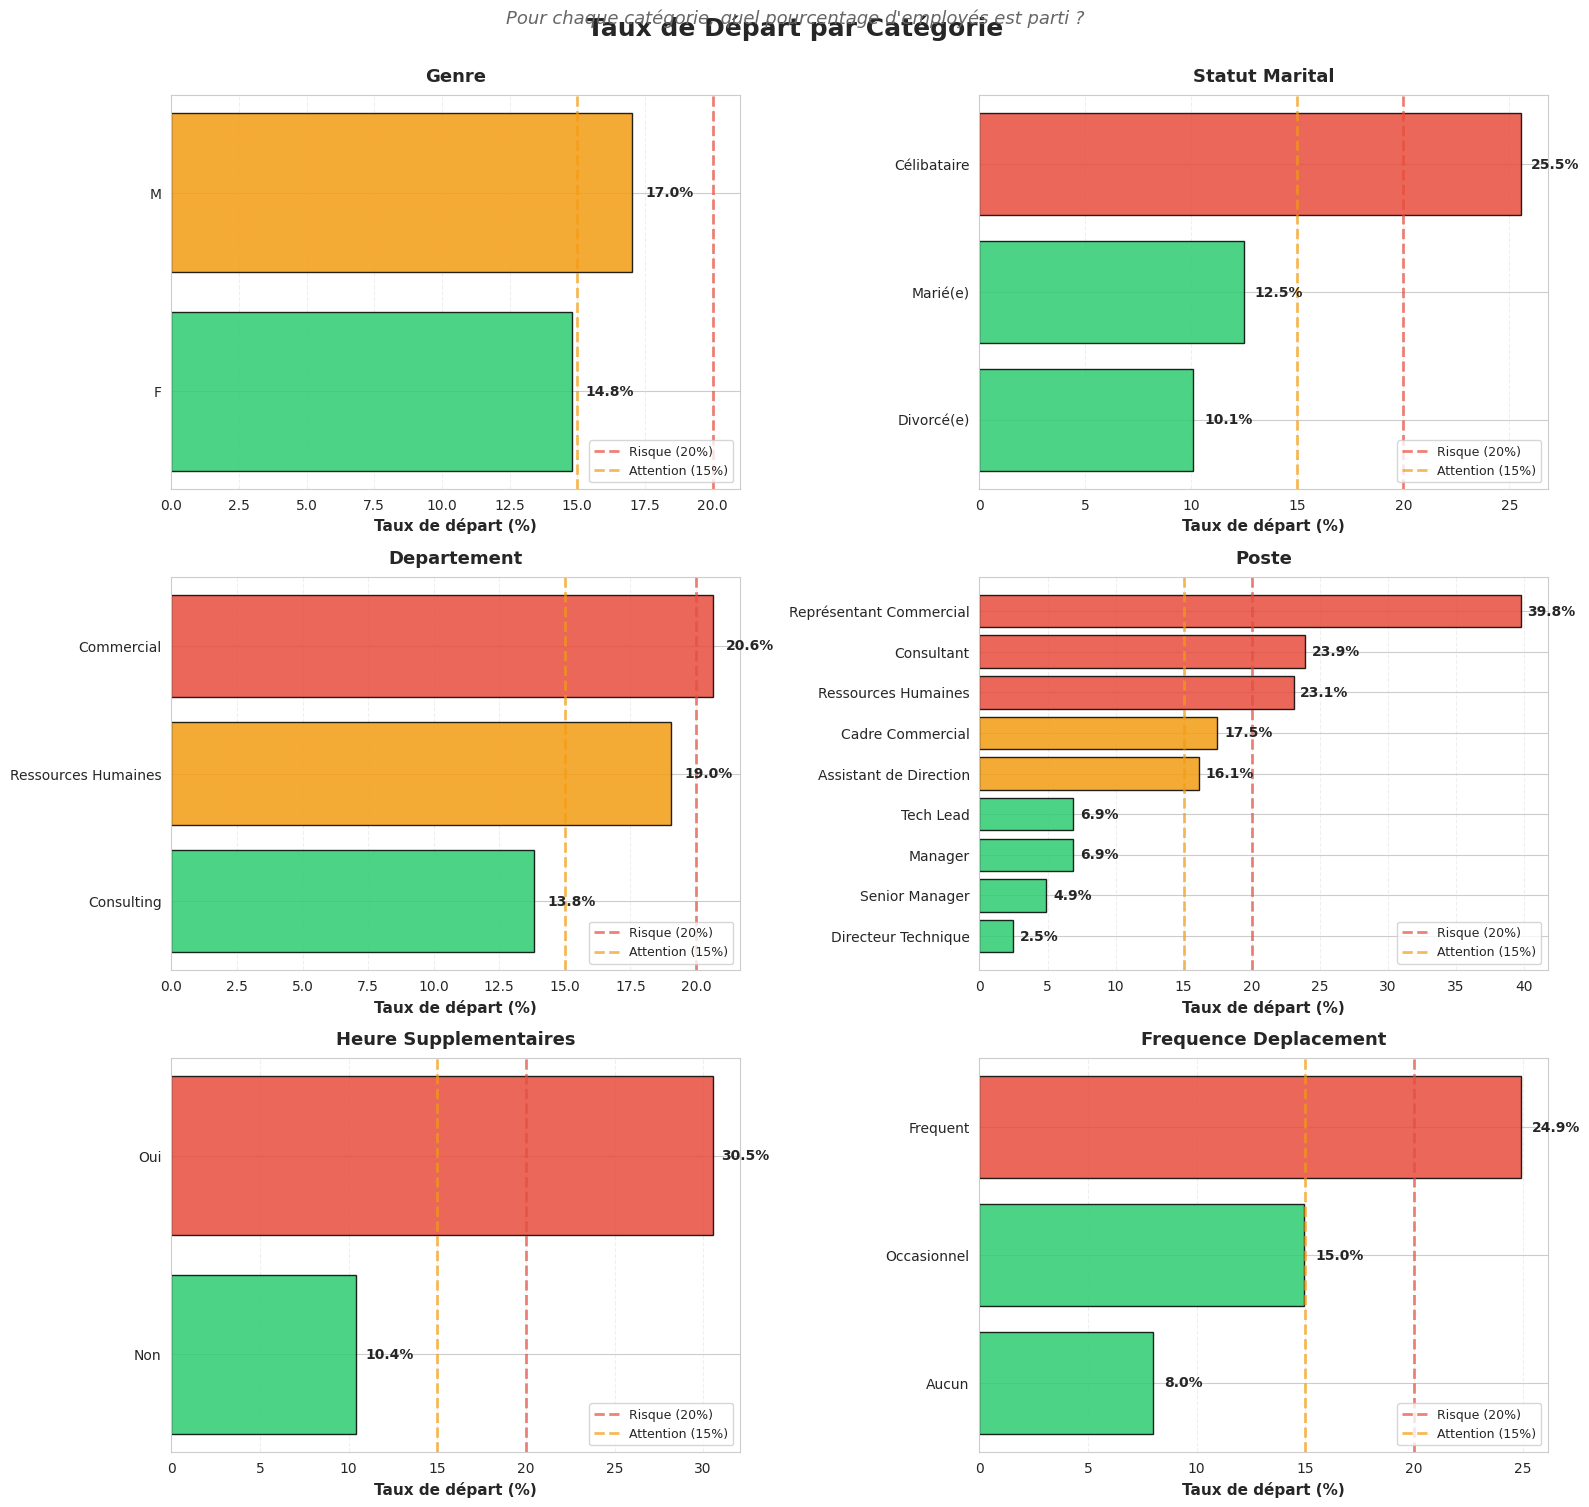

✅ Graphique sauvegardé : graphiques/taux_depart_categories.png


In [23]:
# ════════════════════════════════════════════════════════
# 📊 PARTIE 6.4b : TAUX DE DÉPART PAR CATÉGORIE (GRAPHIQUES)
# ════════════════════════════════════════════════════════

import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('graphiques', exist_ok=True)

# Variables à analyser
vars_a_analyser = ['genre', 'statut_marital', 'departement', 'poste', 
                   'heure_supplementaires', 'frequence_deplacement']

# Calculer nombre de lignes
n_vars = len(vars_a_analyser)
n_cols = 2
n_rows = (n_vars + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 5))
fig.suptitle('Taux de Départ par Catégorie', fontsize=18, fontweight='bold', y=0.998)
fig.text(0.5, 0.992, 'Pour chaque catégorie, quel pourcentage d\'employés est parti ?', 
         ha='center', fontsize=13, style='italic', color='#666666')

# Aplatir axes
axes_flat = axes.flatten() if n_vars > 1 else [axes]

for idx, col in enumerate(vars_a_analyser):
    ax = axes_flat[idx]
    
    # Calculer taux de départ
    taux_depart = df_final.groupby(col)['a_quitte_l_entreprise'].apply(
        lambda x: (x == 'Oui').sum() / len(x) * 100
    ).sort_values(ascending=True)  # Croissant pour barh
    
    # Définir couleurs selon seuils
    colors = []
    for taux in taux_depart.values:
        if taux > 20:
            colors.append('#e74c3c')  # Rouge
        elif taux > 15:
            colors.append('#f39c12')  # Orange
        else:
            colors.append('#2ecc71')  # Vert
    
    # Créer barplot horizontal
    bars = ax.barh(range(len(taux_depart)), taux_depart.values, 
                   color=colors, edgecolor='black', alpha=0.85)
    
    # Configuration axes
    ax.set_yticks(range(len(taux_depart)))
    ax.set_yticklabels(taux_depart.index, fontsize=10)
    ax.set_xlabel('Taux de départ (%)', fontsize=11, fontweight='bold')
    ax.set_title(f'{col.replace("_", " ").title()}', fontsize=13, fontweight='bold', pad=10)
    ax.grid(axis='x', alpha=0.3, linestyle='--')
    
    # Lignes de seuil
    ax.axvline(x=20, color='#e74c3c', linestyle='--', linewidth=2, alpha=0.7, label='Risque (20%)')
    ax.axvline(x=15, color='#f39c12', linestyle='--', linewidth=2, alpha=0.7, label='Attention (15%)')
    ax.legend(loc='lower right', fontsize=9)
    
    # Ajouter valeurs sur barres
    for i, v in enumerate(taux_depart.values):
        ax.text(v + 0.5, i, f'{v:.1f}%', va='center', fontsize=10, fontweight='bold')

# Masquer subplots vides
for idx in range(n_vars, len(axes_flat)):
    axes_flat[idx].axis('off')

plt.tight_layout()
plt.savefig('graphiques/taux_depart_categories.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : graphiques/taux_depart_categories.png")

/tmp/ipykernel_208703/3176039454.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='a_quitte_l_entreprise', y='augmentation_num',
/tmp/ipykernel_208703/3176039454.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_final, x='a_quitte_l_entreprise', y='annee_experience_totale',


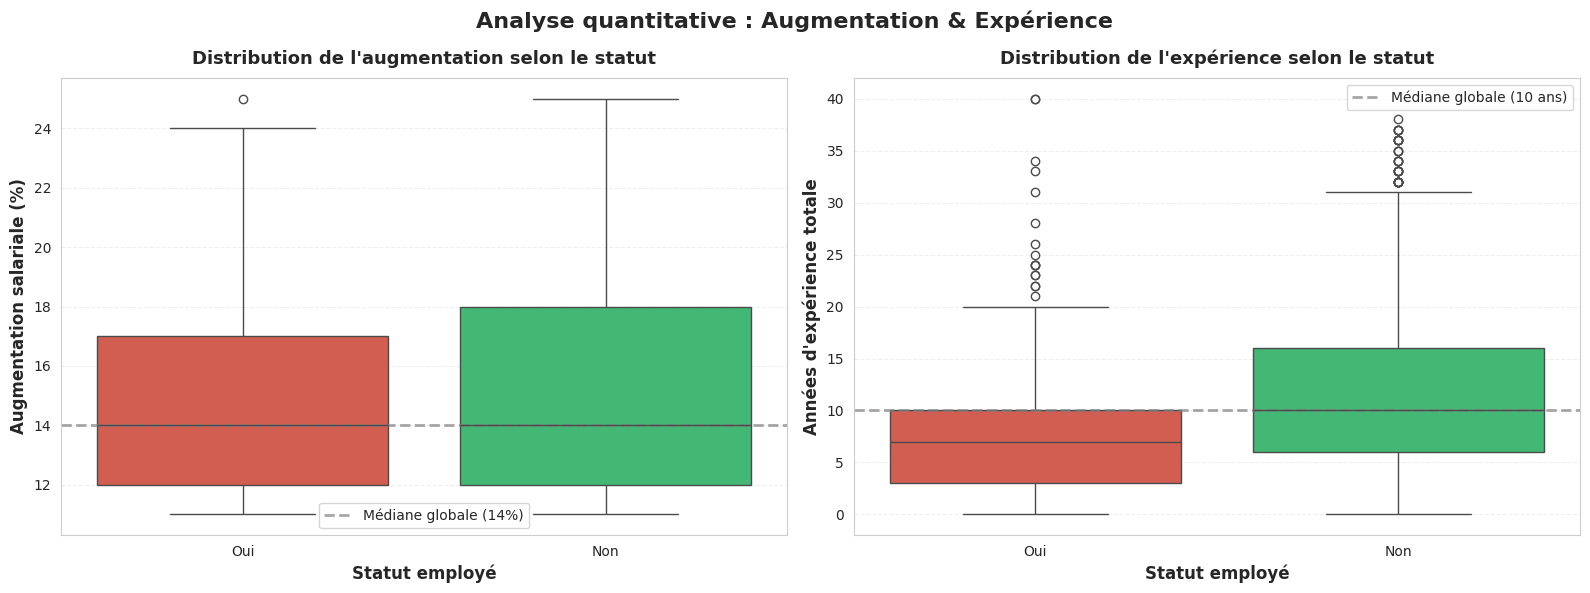

✅ Graphique sauvegardé : graphiques/augmentation_experience_selon_depart.png

📊 STATISTIQUES PAR STATUT

1️⃣  Augmentation salariale :
                        count   mean   std   min   25%   50%   75%   max
a_quitte_l_entreprise                                                   
Non                    1233.0  15.23  3.64  11.0  12.0  14.0  18.0  25.0
Oui                     237.0  15.10  3.77  11.0  12.0  14.0  17.0  25.0

2️⃣  Années d'expérience totale :
                        count   mean   std  min  25%   50%   75%   max
a_quitte_l_entreprise                                                 
Non                    1233.0  11.86  7.76  0.0  6.0  10.0  16.0  38.0
Oui                     237.0   8.24  7.17  0.0  3.0   7.0  10.0  40.0


In [24]:
# ════════════════════════════════════════════════════════
# 📊 ANALYSE QUANTITATIVE : AUGMENTATION & EXPÉRIENCE
# ════════════════════════════════════════════════════════

# Créer la variable numérique
df_final['augmentation_num'] = df_final['augementation_salaire_precedente'].str.replace(' %', '').astype(int)

# Créer figure avec 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Analyse quantitative : Augmentation & Expérience', 
             fontsize=16, fontweight='bold', y=0.98)

# ──────────────────────────────────────────────────────
# GRAPHIQUE 1 : AUGMENTATION
# ──────────────────────────────────────────────────────
ax1 = axes[0]

sns.boxplot(data=df_final, x='a_quitte_l_entreprise', y='augmentation_num', 
            palette={'Non': '#2ecc71', 'Oui': '#e74c3c'}, ax=ax1)

ax1.set_xlabel('Statut employé', fontsize=12, fontweight='bold')
ax1.set_ylabel('Augmentation salariale (%)', fontsize=12, fontweight='bold')
ax1.set_title('Distribution de l\'augmentation selon le statut', 
              fontsize=13, fontweight='bold', pad=10)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Médiane globale
mediane_aug = df_final['augmentation_num'].median()
ax1.axhline(y=mediane_aug, color='gray', linestyle='--', 
            linewidth=2, alpha=0.7, label=f'Médiane globale ({mediane_aug:.0f}%)')
ax1.legend(fontsize=10)

# ──────────────────────────────────────────────────────
# GRAPHIQUE 2 : EXPÉRIENCE
# ──────────────────────────────────────────────────────
ax2 = axes[1]

sns.boxplot(data=df_final, x='a_quitte_l_entreprise', y='annee_experience_totale', 
            palette={'Non': '#2ecc71', 'Oui': '#e74c3c'}, ax=ax2)

ax2.set_xlabel('Statut employé', fontsize=12, fontweight='bold')
ax2.set_ylabel('Années d\'expérience totale', fontsize=12, fontweight='bold')
ax2.set_title('Distribution de l\'expérience selon le statut', 
              fontsize=13, fontweight='bold', pad=10)
ax2.grid(axis='y', alpha=0.3, linestyle='--')

# Médiane globale
mediane_exp = df_final['annee_experience_totale'].median()
ax2.axhline(y=mediane_exp, color='gray', linestyle='--', 
            linewidth=2, alpha=0.7, label=f'Médiane globale ({mediane_exp:.0f} ans)')
ax2.legend(fontsize=10)

plt.tight_layout()
plt.savefig('graphiques/augmentation_experience_selon_depart.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : graphiques/augmentation_experience_selon_depart.png")

# ──────────────────────────────────────────────────────
# STATISTIQUES DESCRIPTIVES
# ──────────────────────────────────────────────────────
print("\n" + "="*70)
print("📊 STATISTIQUES PAR STATUT")
print("="*70)

print("\n1️⃣  Augmentation salariale :")
print(df_final.groupby('a_quitte_l_entreprise')['augmentation_num'].describe().round(2))

print("\n2️⃣  Années d'expérience totale :")
print(df_final.groupby('a_quitte_l_entreprise')['annee_experience_totale'].describe().round(2))

### 📊 PARTIE 6.5a : TESTS STATISTIQUES - T-TEST (STATS)


In [25]:

from scipy.stats import ttest_ind

print("="*70)
print("🔬 T-TESTS : DIFFÉRENCES SIGNIFICATIVES ?")
print("="*70)

print("\n💡 Principe du t-test :")
print("   • Compare les moyennes entre 2 groupes (Partis vs Restés)")
print("   • p-value < 0.05 → Différence statistiquement significative")
print("   • p-value ≥ 0.05 → Pas de différence significative\n")

# Séparer les groupes
partis = df_final[df_final['a_quitte_l_entreprise'] == 'Oui']
restes = df_final[df_final['a_quitte_l_entreprise'] == 'Non']

print(f"📊 Groupes analysés : {len(partis)} partis vs {len(restes)} restés\n")
print("="*70)

# Variables à tester
vars_a_tester = ['age', 'revenu_mensuel', 'annees_dans_l_entreprise',
                 'annee_experience_totale', 'satisfaction_employee_environnement', 
                 'note_evaluation_actuelle', 'satisfaction_employee_nature_travail',
                 'satisfaction_employee_equipe', 'satisfaction_employee_equilibre_pro_perso']

resultats_ttests = []

for var in vars_a_tester:
    # Calculer t-test
    t_stat, p_value = ttest_ind(partis[var], restes[var])
    
    # Moyennes des groupes
    moy_partis = partis[var].mean()
    moy_restes = restes[var].mean()
    diff = moy_partis - moy_restes
    
    # Significativité
    significatif = p_value < 0.05
    symbole = "✅" if significatif else "❌"
    
    resultats_ttests.append({
        'Variable': var,
        'Moy_Partis': moy_partis,
        'Moy_Restés': moy_restes,
        'Différence': diff,
        't_stat': t_stat,
        'p_value': p_value,
        'Significatif': significatif
    })
    
    print(f"\n📊 {var.upper().replace('_', ' ')}")
    print("-"*70)
    print(f"   Partis  : {moy_partis:.2f}")
    print(f"   Restés  : {moy_restes:.2f}")
    print(f"   Diff    : {diff:+.2f}")
    print(f"   t-stat  : {t_stat:.3f}")
    print(f"   p-value : {p_value:.6f}  {symbole} {'Significatif' if significatif else 'Non significatif'}")

# Créer DataFrame résumé
df_ttests = pd.DataFrame(resultats_ttests)
nb_significatifs = df_ttests['Significatif'].sum()

print("\n" + "="*70)
print("📈 RÉSUMÉ DES T-TESTS")
print("="*70)
print(f"\n✅ Variables significatives : {nb_significatifs}/{len(vars_a_tester)}")
print(f"❌ Variables non significatives : {len(vars_a_tester) - nb_significatifs}/{len(vars_a_tester)}")

print("\n🎯 Variables clés pour expliquer les départs (p < 0.05) :")
vars_significatives = df_ttests[df_ttests['Significatif'] == True].sort_values('p_value')
for _, row in vars_significatives.iterrows():
    sens = "↑" if row['Différence'] > 0 else "↓"
    print(f"   {sens} {row['Variable']:40s} (p={row['p_value']:.6f})")

print("\n" + "="*70)

🔬 T-TESTS : DIFFÉRENCES SIGNIFICATIVES ?

💡 Principe du t-test :
   • Compare les moyennes entre 2 groupes (Partis vs Restés)
   • p-value < 0.05 → Différence statistiquement significative
   • p-value ≥ 0.05 → Pas de différence significative

📊 Groupes analysés : 237 partis vs 1233 restés


📊 AGE
----------------------------------------------------------------------
   Partis  : 33.61
   Restés  : 37.56
   Diff    : -3.95
   t-stat  : -6.179
   p-value : 0.000000  ✅ Significatif

📊 REVENU MENSUEL
----------------------------------------------------------------------
   Partis  : 4787.09
   Restés  : 6832.74
   Diff    : -2045.65
   t-stat  : -6.204
   p-value : 0.000000  ✅ Significatif

📊 ANNEES DANS L ENTREPRISE
----------------------------------------------------------------------
   Partis  : 5.13
   Restés  : 7.37
   Diff    : -2.24
   t-stat  : -5.196
   p-value : 0.000000  ✅ Significatif

📊 ANNEE EXPERIENCE TOTALE
-----------------------------------------------------------------

### PARTIE 6.5b : T-TESTS (GRAPHIQUES)


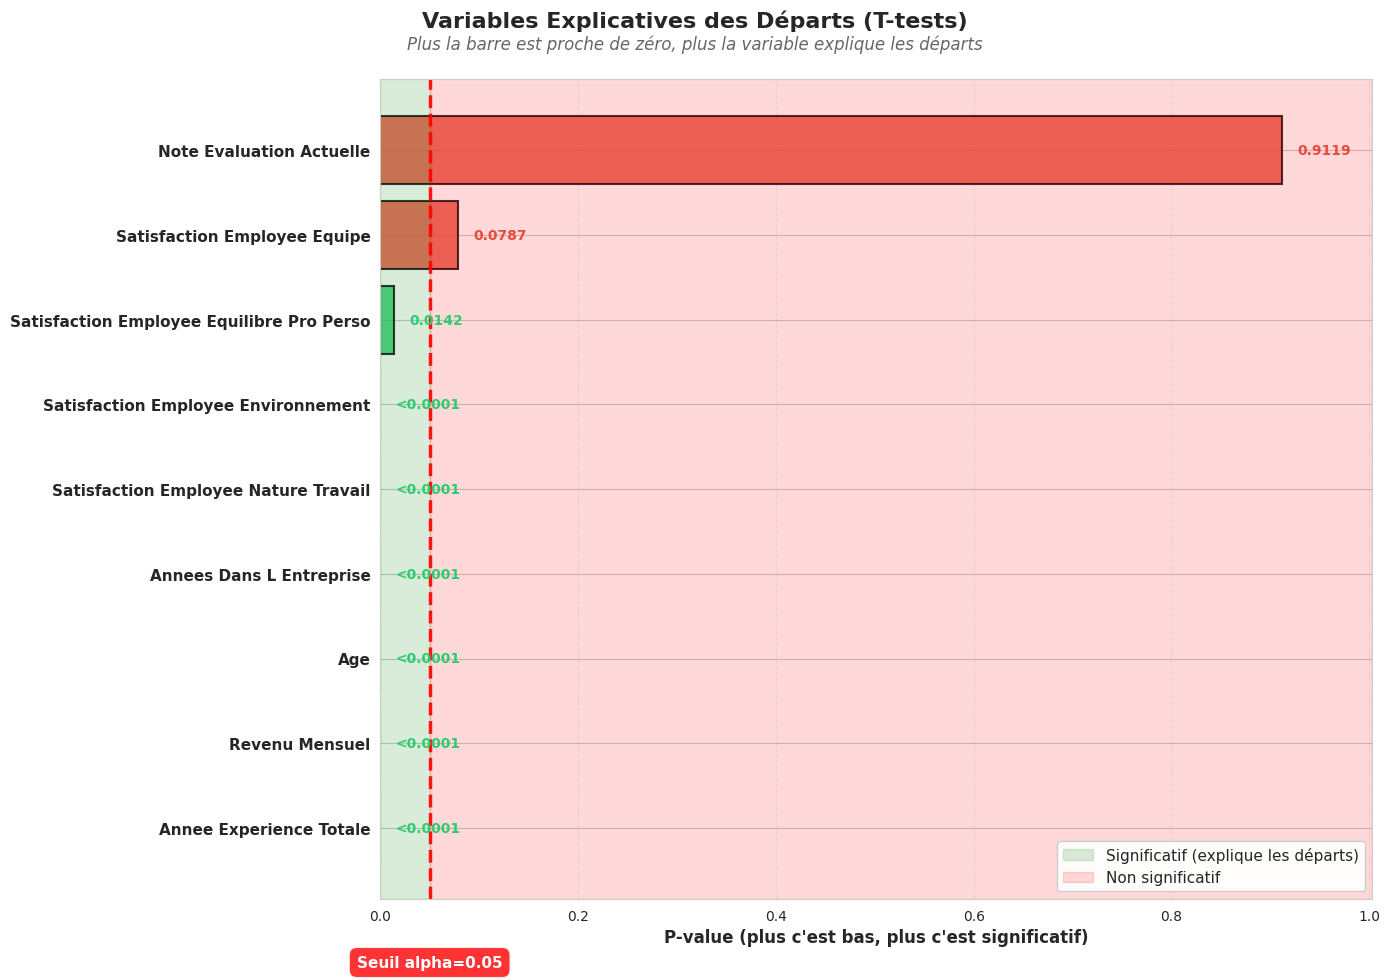

✅ Graphique sauvegardé : graphiques/variables_explicatives_departs.png

📊 Résumé : 7/9 variables expliquent les départs

🎯 TOP 5 des variables qui expliquent LE PLUS les départs :
annee_experience_totale                       | p=0.000000 | [SIGNIFICATIF]
revenu_mensuel                                | p=0.000000 | [SIGNIFICATIF]
age                                           | p=0.000000 | [SIGNIFICATIF]
annees_dans_l_entreprise                      | p=0.000000 | [SIGNIFICATIF]
satisfaction_employee_nature_travail          | p=0.000070 | [SIGNIFICATIF]


In [26]:
# ════════════════════════════════════════════════════════
# 📊 PARTIE 6.5b : T-TESTS (GRAPHIQUES) - VERSION AMÉLIORÉE
# ════════════════════════════════════════════════════════

import matplotlib.pyplot as plt
import os

os.makedirs('graphiques', exist_ok=True)

# Créer graphique des p-values
fig, ax = plt.subplots(figsize=(14, 10))

# Titre principal
fig.suptitle('Variables Explicatives des Départs (T-tests)', 
             fontsize=16, fontweight='bold', y=0.97)

# Sous-titre avec plus d'espace
fig.text(0.5, 0.93, 'Plus la barre est proche de zéro, plus la variable explique les départs', 
         ha='center', fontsize=12, style='italic', color='#666666')

# Trier par p-value (du plus significatif au moins significatif)
df_ttests_sorted = df_ttests.sort_values('p_value', ascending=True)

# Couleurs inversées : VERT = significatif, ROUGE = non significatif
colors = ['#2ecc71' if sig else '#e74c3c' for sig in df_ttests_sorted['Significatif']]

# Barplot horizontal
bars = ax.barh(range(len(df_ttests_sorted)), df_ttests_sorted['p_value'], 
               color=colors, edgecolor='black', alpha=0.8, linewidth=1.5)

# Configuration
ax.set_yticks(range(len(df_ttests_sorted)))
ax.set_yticklabels([var.replace('_', ' ').title() for var in df_ttests_sorted['Variable']], 
                    fontsize=11, fontweight='bold')
ax.set_xlabel('P-value (plus c\'est bas, plus c\'est significatif)', fontsize=12, fontweight='bold')
ax.set_xlim(0, max(df_ttests_sorted['p_value'].max() * 1.1, 0.1))

# Ligne de seuil
ax.axvline(x=0.05, color='red', linestyle='--', linewidth=2.5, alpha=0.9)

# Zones annotées
ax.axvspan(0, 0.05, alpha=0.15, color='green', label='Significatif (explique les départs)')
ax.axvspan(0.05, ax.get_xlim()[1], alpha=0.15, color='red', label='Non significatif')

ax.legend(loc='lower right', fontsize=11, framealpha=0.95)
ax.grid(axis='x', alpha=0.3, linestyle='--')

# Ajouter valeurs sur barres
for i, (p, sig) in enumerate(zip(df_ttests_sorted['p_value'], df_ttests_sorted['Significatif'])):
    label = f'{p:.4f}' if p >= 0.0001 else '<0.0001'
    x_pos = p + (ax.get_xlim()[1] * 0.015)
    color_text = '#2ecc71' if sig else '#e74c3c'
    ax.text(x_pos, i, label, va='center', fontsize=10, fontweight='bold', color=color_text)

# Annotation du seuil - REPOSITIONNÉE PLUS BAS
y_position = -1.5  # Position en dessous du graphique
ax.text(0.05, y_position, 'Seuil alpha=0.05', 
        rotation=0, va='top', ha='center', fontsize=11, 
        color='white', fontweight='bold',
        bbox=dict(boxstyle='round,pad=0.5', facecolor='red', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(top=0.90, bottom=0.08)  # Plus d'espace en haut et en bas
plt.savefig('graphiques/variables_explicatives_departs.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : graphiques/variables_explicatives_departs.png")
print(f"\n📊 Résumé : {df_ttests['Significatif'].sum()}/{len(vars_a_tester)} variables expliquent les départs")

# Afficher le top 5 des variables les plus explicatives
print("\n🎯 TOP 5 des variables qui expliquent LE PLUS les départs :")
print("="*70)
top5 = df_ttests_sorted.head(5)
for idx, row in top5.iterrows():
    statut = "[SIGNIFICATIF]" if row['Significatif'] else "[Non significatif]"
    print(f"{row['Variable']:45s} | p={row['p_value']:.6f} | {statut}")

### 📊 PARTIE 6.6 : TEST CHI² - DÉPARTEMENT vs POSTE


In [27]:
# ════════════════════════════════════════════════════════
# 📊 PARTIE 6.6 : TEST CHI² - DÉPARTEMENT vs POSTE
# ════════════════════════════════════════════════════════

from scipy.stats import chi2_contingency

print("="*70)
print("🔬 TEST CHI² : DÉPARTEMENT et POSTE sont-ils liés ?")
print("="*70)

print("\n💡 Principe du Chi² :")
print("   • Teste l'indépendance entre 2 variables qualitatives")
print("   • p-value < 0.05 → Variables DÉPENDANTES (liées)")
print("   • p-value ≥ 0.05 → Variables INDÉPENDANTES\n")

# Tableau de contingence
contingency = pd.crosstab(df_final['departement'], df_final['poste'])

print("📊 Tableau de contingence (effectifs) :")
print("-"*70)
print(contingency)

# Test Chi²
chi2, p_value, dof, expected = chi2_contingency(contingency)

print("\n" + "="*70)
print("🔬 RÉSULTATS DU TEST")
print("="*70)
print(f"   Chi² statistic : {chi2:.2f}")
print(f"   p-value        : {p_value:.10f}")
print(f"   Degrés liberté : {dof}")

# Interprétation
print("\n" + "="*70)
print("💡 INTERPRÉTATION")
print("="*70)

if p_value < 0.05:
    print("   ✅ FORTE DÉPENDANCE DÉTECTÉE (p < 0.05)")
    print("\n   📌 Que signifie cette dépendance ?")
    print("      → Département et Poste sont statistiquement liés")
    print("      → Connaître le Poste permet de deviner le Département")
    print("      → Les 2 variables contiennent de l'information redondante")
    
    print("\n   ⚠️  PROBLÈME pour le modèle ML :")
    print("      → Multicollinéarité (variables corrélées)")
    print("      → Inflation inutile du nombre de features")
    print("      → Risque de surapprentissage")
    
    print("\n   ✅ RECOMMANDATION :")
    print("      → SUPPRIMER : departement (moins précis)")
    print("      → GARDER    : poste (plus détaillé)")
    print("      → Exemple   : 'Représentant Commercial' est plus informatif que 'Commercial'")
else:
    print("   ❌ Variables indépendantes (p ≥ 0.05)")
    print("   📌 RECOMMANDATION : Garder les 2 variables")

print("\n" + "="*70)

🔬 TEST CHI² : DÉPARTEMENT et POSTE sont-ils liés ?

💡 Principe du Chi² :
   • Teste l'indépendance entre 2 variables qualitatives
   • p-value < 0.05 → Variables DÉPENDANTES (liées)
   • p-value ≥ 0.05 → Variables INDÉPENDANTES

📊 Tableau de contingence (effectifs) :
----------------------------------------------------------------------
poste                Assistant de Direction  Cadre Commercial  Consultant  Directeur Technique  Manager  \
departement                                                                                               
Commercial                                0               326           0                    0        0   
Consulting                              292                 0         259                   80      131   
Ressources Humaines                       0                 0           0                    0        0   

poste                Représentant Commercial  Ressources Humaines  Senior Manager  Tech Lead  
departement                   

### 📊 PARTIE 6.6b : VISUALISATION CHI² - HEATMAP


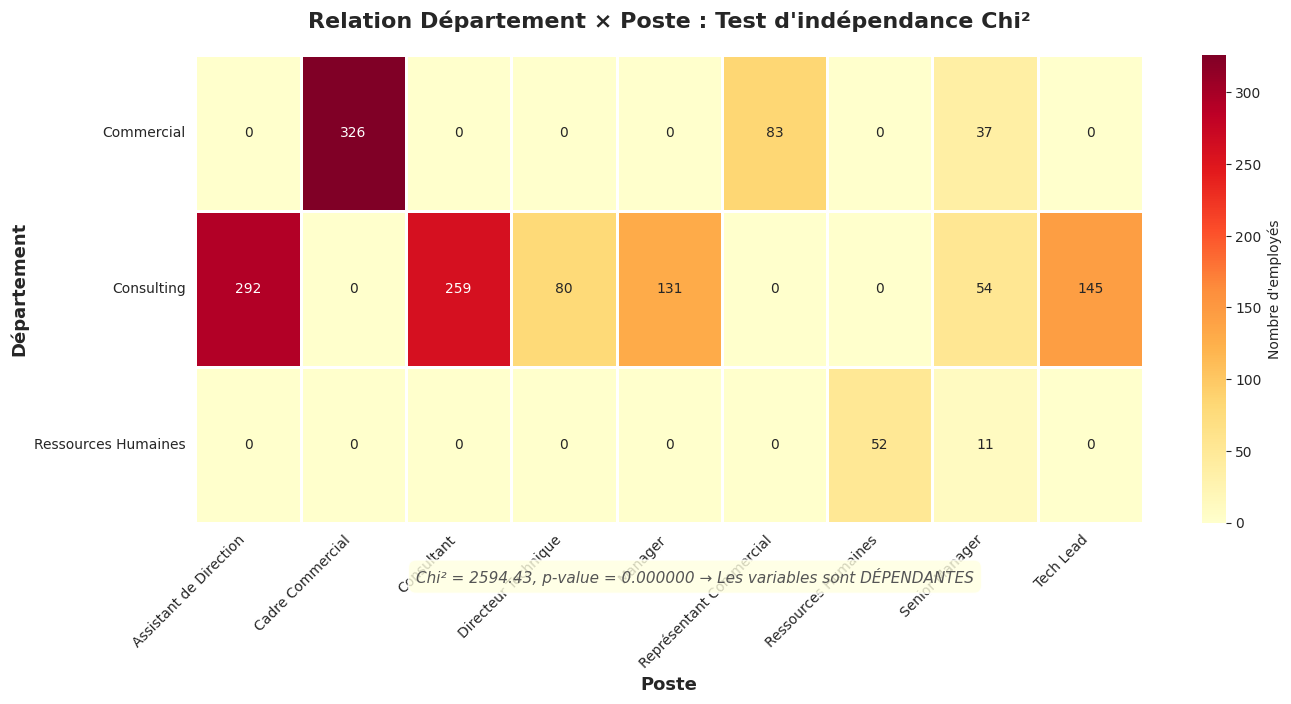

✅ Graphique sauvegardé : graphiques/chi2_dept_poste.png

💡 Interprétation visuelle :
   • Cases avec 0 (blanc) → Combinaison impossible → Variables liées
   • Cases colorées → Employés dans cette combinaison
   • Beaucoup de 0 → Forte dépendance entre département et poste


In [28]:
# ════════════════════════════════════════════════════════
# 📊 PARTIE 6.6b : VISUALISATION CHI² - HEATMAP
# ════════════════════════════════════════════════════════

import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs('graphiques', exist_ok=True)

# Créer heatmap
fig, ax = plt.subplots(figsize=(14, 6))

# Titre + sous-titre
ax.set_title('Relation Département × Poste : Test d\'indépendance Chi²', 
             fontsize=16, fontweight='bold', pad=20)

# Heatmap avec annotations
sns.heatmap(contingency, annot=True, fmt='d', cmap='YlOrRd', 
            ax=ax, cbar_kws={'label': 'Nombre d\'employés'},
            linewidths=1, linecolor='white',
            cbar=True, square=False)

# Configuration
ax.set_xlabel('Poste', fontsize=13, fontweight='bold')
ax.set_ylabel('Département', fontsize=13, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=10)

# Sous-titre explicatif
fig.text(0.5, 0.02, 
         f'Chi² = {chi2:.2f}, p-value = {p_value:.6f} → Les variables sont {"DÉPENDANTES" if p_value < 0.05 else "INDÉPENDANTES"}', 
         ha='center', fontsize=11, style='italic', color='#555555',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.subplots_adjust(bottom=0.12)  # Espace pour le sous-titre
plt.savefig('graphiques/chi2_dept_poste.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Graphique sauvegardé : graphiques/chi2_dept_poste.png")
print("\n💡 Interprétation visuelle :")
print("   • Cases avec 0 (blanc) → Combinaison impossible → Variables liées")
print("   • Cases colorées → Employés dans cette combinaison")
print("   • Beaucoup de 0 → Forte dépendance entre département et poste")


## 💾 PARTIE 7 : SAUVEGARDE DU DATASET FINAL

In [29]:
# Chemin de sauvegarde
chemin_save = 'resultats/DiBattista_Barbara_4_csv_resultat_nettoyage_122025.csv'

# Sauvegarde
df_final.to_csv(chemin_save, index=False, encoding='utf-8')

print(f"\n✅ Dataset sauvegardé : {chemin_save}")
print(f"📊 Shape : {df_final.shape}")
print(f"📝 Colonnes : {df_final.shape[1]}")
print(f"👥 Employés : {df_final.shape[0]}")

print("\n" + "="*70)
print("✅ NOTEBOOK 1 TERMINÉ - Prêt pour la préparation modélisation")
print("="*70)


✅ Dataset sauvegardé : resultats/DiBattista_Barbara_4_csv_resultat_nettoyage_122025.csv
📊 Shape : (1470, 32)
📝 Colonnes : 32
👥 Employés : 1470

✅ NOTEBOOK 1 TERMINÉ - Prêt pour la préparation modélisation
